Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


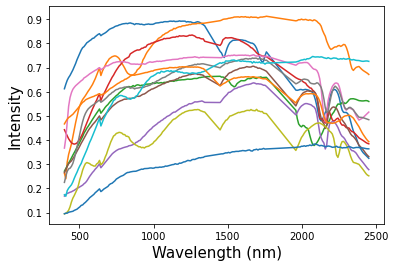

In [3]:
%pylab inline
from pysptools import abundance_maps
import numpy
from random import sample as randsamp
import pandas as pd

import random
import urllib
import itertools
from scipy.io import loadmat
from scipy.signal import convolve2d

dataset = "cuprite"

d = loadmat("../input/reference-datasets/" + dataset + "/" + dataset + ".mat")
em = loadmat("../input/reference-datasets/" + dataset + "/endmembers/endmembers.mat")
dinfo = pd.read_csv("../input/reference-datasets/" + dataset + "/info.csv",header=None,index_col=None,names=["parameter",'value','unit'])

nrow = int(dinfo[dinfo['parameter'] == 'nrow'].value.values[0])
ncol = int(dinfo[dinfo['parameter'] == 'ncol'].value.values[0])

nbands = int(dinfo[dinfo['parameter'] == 'nbands'].value.values[0])
spec_start = dinfo[dinfo['parameter'] == 'spec_start'].value.values[0]
spec_end = dinfo[dinfo['parameter'] == 'spec_end'].value.values[0]

data = d['Y']
data = data / data.max()
try:
    spec_bands = d['SlectBands'].flatten()
except:
    spec_bands = arange(0,nbands)

# Define wavelength array
wavelength = linspace(spec_start,spec_end,nbands)
wavelength = wavelength[spec_bands]

if len(em['M']) > len(wavelength):
    endmembers = em['M'][spec_bands]
else:
    endmembers = em['M']

endmembers = endmembers.reshape(len(wavelength),-1)

a_map = em["A"].reshape((endmembers.shape[1],nrow,ncol)).T

hypercube = data.copy()
spectra = endmembers.T
hypercube = hypercube.reshape(len(wavelength), a_map.shape[1], a_map.shape[0]).T

figure(1)
plot(wavelength, spectra[0])
plot(wavelength, spectra[1])
plot(wavelength, spectra[2])
plot(wavelength, spectra[3])
plot(wavelength, spectra[4])
plot(wavelength, spectra[5])
plot(wavelength, spectra[6])
plot(wavelength, spectra[7])
plot(wavelength, spectra[8])
plot(wavelength, spectra[9])
plot(wavelength, spectra[10])
plot(wavelength, spectra[11])
xlabel("Wavelength (nm)",fontsize=15)
ylabel("Intensity",fontsize=15)

plt.show()

'cut it first, my computer cannot run the whole dataset, need to used online GPU'

# upper left corner
area_1 = hypercube[:20,:20,:]
map_1 = a_map[:20,:20,:]

#centre
area_2 = hypercube[100:120,100:120,:]
map_2 = a_map[:20,:20,:]

#endmember 6
area_3 = hypercube[100:120,130:150,:]
map_3 = a_map[100:120,130:150,:]

#endmember 7
area_4 = hypercube[230:250,100:120,:]
map_4 = a_map[230:250,100:120,:]


data_1 = np.append(area_1, area_2,axis = 0)
data_map_1 = np.append(map_1, map_2, axis = 0)

data_2 = np.append(area_3, area_4,axis = 0)
data_map_2 = np.append(map_3, map_4, axis = 0)

hypercube = np.append(data_1, data_2,axis = 1)
a_map = np.append(data_map_1, data_map_2,axis = 1)



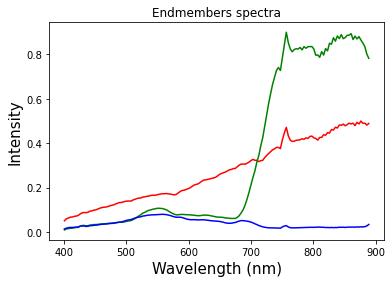

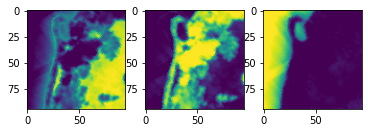

In [8]:
dataset = "samson"

d = loadmat("../input/reference-datasets/" + dataset + "/" + dataset + ".mat")
em = loadmat("../input/reference-datasets/" + dataset + "/endmembers/endmembers.mat")
dinfo = pd.read_csv("../input/reference-datasets/" + dataset + "/info.csv",header=None,index_col=None,names=["parameter",'value','unit'])

nrow = int(dinfo[dinfo['parameter'] == 'nrow'].value.values[0])
ncol = int(dinfo[dinfo['parameter'] == 'ncol'].value.values[0])

nbands = int(dinfo[dinfo['parameter'] == 'nbands'].value.values[0])
spec_start = dinfo[dinfo['parameter'] == 'spec_start'].value.values[0]
spec_end = dinfo[dinfo['parameter'] == 'spec_end'].value.values[0]

data = d['Y']
data = data / data.max()
try:
    spec_bands = d['SlectBands'].flatten()
except:
    spec_bands = arange(0,nbands)

# Define wavelength array
wavelength = linspace(spec_start,spec_end,nbands)
wavelength = wavelength[spec_bands]

if len(em['M']) > len(wavelength):
    endmembers = em['M'][spec_bands]
else:
    endmembers = em['M']

endmembers = endmembers.reshape(len(wavelength),-1)

a_map = em["A"].reshape((endmembers.shape[1],nrow,ncol)).T

hypercube = data.copy()
spectra = endmembers.T
hypercube = hypercube.reshape(len(wavelength), a_map.shape[1], a_map.shape[0]).T

# it is found the endmembers' spectra are normalised to 1, which is not the real spectra
# for the original spectra, see paper:
# Zhu, 2017, Hyperspectral Unmixing: Ground Truth Labeling, Datasets, Benchmark Performances and Survey.
spectra[0] = spectra[0] * 0.5
spectra[1] = spectra[1] * 0.9
spectra[2] = spectra[2] * 0.08


figure(1)
plot(wavelength, spectra[0], color='r')
plot(wavelength, spectra[1], color='g')
plot(wavelength, spectra[2], color='b')

xlabel("Wavelength (nm)",fontsize=15)
ylabel("Intensity",fontsize=15)
title('Endmembers spectra')

plt.show()
figure(2)
subplot(1,3,1)
imshow(a_map[:,:,0])
subplot(1,3,2)
imshow(a_map[:,:,1])
subplot(1,3,3)
imshow(a_map[:,:,2])



plt.show()



In [9]:
# Load some example spectra and subsample.
# Columns are: [wavelength, excitation, emission]
af610 = pd.read_csv("../input/AF610.csv").values[::5]
af647 = pd.read_csv("../input/AF647.csv").values[::5]
af700 = pd.read_csv("../input/AF700.csv").values[::5]
af750 = pd.read_csv("../input/AF750.csv").values[::5]

wavelength = af610[:,0]
spectra = array([af610[:,2],af647[:,2],af700[:,2],af750[:,2]])

# Generate examples to use for GUI.
a_map = ones((200,200,4))

for i in range (4):
    a_map[:,:,i] = array([uint16(imread("../input/USAF.png")[69:, :1200, 3])])[0,::6,::6]
spectra = array([af610[:,2],af647[:,2],af700[:,2],af750[:,2]])
noise = rand(200,200,1)/5.

a_map.shape

(200, 200, 4)

Text(0.5, 1.0, 'Endmembers spectra')

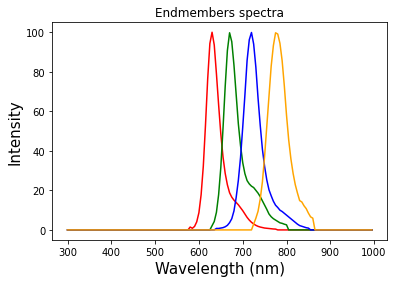

In [12]:
figure(1)
plot(wavelength, spectra[0], color='r')
plot(wavelength, spectra[1], color='g')
plot(wavelength, spectra[2], color='b')
plot(wavelength, spectra[3], color='orange')

xlabel("Wavelength (nm)",fontsize=15)
ylabel("Intensity",fontsize=15)
title('Endmembers spectra')

